In [1]:
from env import host, user, password
import pandas as pd
import numpy as np
import math

In [2]:
db_name = "employees"

In [3]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [4]:
query ='SELECT * FROM employees LIMIT 5 OFFSET 50'

In [5]:
pd.read_sql(query, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [6]:
pd.read_sql('SHOW TABLES', url)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


## 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [7]:
from pydataset import data
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




- On average, which manufacturer has the best miles per gallon?

In [8]:
mpg.groupby('manufacturer').hwy.agg(['median']).nlargest(n=1, columns="median")

,median
manufacturer,
honda,32.0


- How many different manufacturers are there?

In [9]:
mpg.manufacturer.nunique()

15

- How many different models are there?

In [10]:
mpg.model.nunique()

38

In [11]:
print(mpg)

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    compact  
5    compact  
..       

- Do automatic or manual cars have better miles per gallon?

In [12]:
(mpg
 .assign(trans_mode=mpg.trans.apply(lambda n: 'automatic' if 'auto' in n else 'manual'))
        .groupby(['trans_mode'])
        .hwy.agg(['median']))

,median
trans_mode,
automatic,22
manual,26


## 2. Joining and Merging

- Copy the users and roles dataframes from the examples above.

In [13]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [14]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


- What do you think a right join would look like? An outer join? 

In [15]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [16]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer').drop(columns="id_y")

,id_x,name_x,role_id,name_y
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,NaN,commenter


#### - What happens if you drop the foreign keys from the dataframes and try to merge them?

we would not be able to join the table because the lack of indexes

## 3. Getting data from SQL databases

#### a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [17]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

#### b. Use your function to obtain a connection to the employees database.

In [18]:
url2 = get_db_url(db_name)
pd.read_sql(query, url2)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


#### c. Once you have successfully run a query:

- Intentionally make a typo in the database url. What kind of error message do you see?

In [19]:
url3 = f'mysql+pymysql://{users}:{password}@{host}/employees/'
# pd.read_sql(query, url3)

OperationalError: (pymysql.err.OperationalError) (1045, "Access denied for user '   
id   name  role_id\n0   1    bob      1.0\n1   '@'97.105.19.58' (using password: YES)"

- Intentionally make an error in your SQL query. What does the error message look like?

In [20]:
#query2 ='SELECT * FROM employes'
#pd.read_sql(query2, url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'chipotle.employes' doesn't exist")
[SQL: SELECT * FROM employes]

In [21]:
query2 ='SELECT * FROM employees'
query3 ='SELECT * FROM titles'
query4 ='SELECT * FROM departments'
query5 ='SELECT * FROM dept_emp'

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employes' doesn't exist")
[SQL: SELECT * FROM employes LIMIT 5 OFFSET 50]

#### d. Read the employees and titles tables into two separate dataframes

In [22]:
employees = pd.read_sql(query2, url)
titles = pd.read_sql(query3, url)
departments = pd.read_sql(query4, url)
dept_emp = pd.read_sql(query5, url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [23]:
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


#### e. Visualize the number of employees with each title.

In [24]:
titles.groupby('title').emp_no.agg(['count']).plot.bar()

#### f. Join the employees and titles dataframes together.

In [25]:
et = pd.merge(
    employees, 
    titles,
    left_on='emp_no',
    right_on='emp_no',
    how='left'
)

et

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


#### g. Visualize how frequently employees change titles.

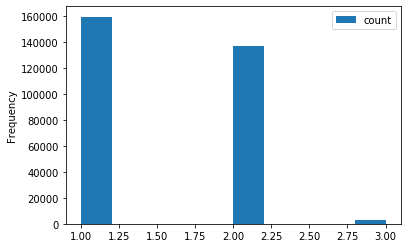

In [26]:
et.groupby('emp_no').title.agg(['count']).plot.hist()

#### h. For each title, find the hire date of the employee that was hired most recently with that title.

In [27]:
et.groupby('title').hire_date.agg(['max'])

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


#### i. Write the code necessary to create a cross tabulation of the number of titles by department. 
(Hint: this will involve a combination of SQL and python/pandas code)

In [28]:
de = pd.merge( 
    dept_emp,
    departments,
    left_on='dept_no',
    right_on='dept_no',
    how='left'
)

de

,emp_no,dept_no,from_date,to_date,dept_name
0,10001,d005,1986-06-26,9999-01-01,Development
1,10002,d007,1996-08-03,9999-01-01,Sales
2,10003,d004,1995-12-03,9999-01-01,Production
3,10004,d004,1986-12-01,9999-01-01,Production
4,10005,d003,1989-09-12,9999-01-01,Human Resources
...,...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01,Production
331599,499996,d004,1996-05-13,9999-01-01,Production
331600,499997,d005,1987-08-30,9999-01-01,Development
331601,499998,d002,1993-12-27,9999-01-01,Finance


In [29]:
det = pd.merge( 
    et,
    de,
    left_on='emp_no',
    right_on='emp_no',
    how='left'
)

det

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,1995-12-03,9999-01-01,Production
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,1986-12-01,9999-01-01,Production
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,1986-12-01,9999-01-01,Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489898,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,d005,1987-08-30,9999-01-01,Development
489899,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,d005,1987-08-30,9999-01-01,Development
489900,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,d002,1993-12-27,9999-01-01,Finance
489901,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,d002,1993-12-27,9999-01-01,Finance


In [30]:
et

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [31]:
titles_by_departments = pd.crosstab(det.dept_name, det.title)
titles_by_departments

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [32]:
#titles_by_departments.plot.bar()

## 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [33]:
db_name = "chipotle"
db_table = "orders"
url = get_db_url(db_name)
url
query ='SELECT * FROM orders'
chipotle = pd.read_sql(query, url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


#### - What is the total price for each order?

In [34]:
def convert_to_float(str):
    return float(str.strip('$'))
    

In [35]:
# chipolte['item_price'] = chipotle['item_price'].replace('[\$]', '', regex=True).astype(float)
chipotle["item_total"] = chipotle.item_price.apply(convert_to_float)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price,item_total
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75


In [36]:
chipotle.groupby('order_id').item_total.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_total, Length: 1834, dtype: float64

#### - What are the most popular 3 items?

In [37]:
chipotle.groupby('item_name').quantity.agg(['count']).nlargest(n=3, columns="count")

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479


#### - Which item has produced the most revenue?

In [38]:
chipotle.groupby('item_name').item_total.agg(['sum']).nlargest(n=1, columns="sum")

,sum
item_name,
Chicken Bowl,7342.73
